In [ ]:
#Loading packages

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
#Creating the matrix storing affinity data from ChEMBL and ECFP

In [5]:
interaction_patterns = pd.read_csv('/home/daniele/Desktop/plip/map/interaction_patterns.txt' , sep=':', usecols=['BIN', 'TAR_PDB', 'LIG_PDB', 'CHAIN', 'POSITION'], dtype= {'BIN': np.int, 'TAR_PDB': np.str, 'LIG_PDB': np.str, 'CHAIN': np.str, 'POSITION': np.int} )

In [6]:
pdb_to_chembl=pd.read_csv('/home/daniele/Desktop/plip/map/src1src3.txt' , sep='\t', usecols=['LIG_CHEMBL','LIG_PDB'], dtype= {'LIG_CHEMBL': np.str, 'LIG_PDB': np.str} )

In [7]:
lig_mapped = pd.merge(interaction_patterns, pdb_to_chembl, on= [ 'LIG_PDB'])

In [8]:
pdb_to_uniprot=pd.read_csv('/home/daniele/Desktop/plip/map/pdb_chain_uniprot.tsv' , sep='\t', usecols=['TAR_PDB','CHAIN', 'TAR_UNIPROT'], dtype= {'PDB': np.str, 'CHAIN': np.str, 'TAR_UNIPROT': np.str} )

In [9]:
pdb_to_uniprot['TAR_PDB'] = map(lambda x: x.upper(), pdb_to_uniprot['TAR_PDB'])

In [10]:
tar_pdb_uniprot = pd.merge(lig_mapped, pdb_to_uniprot, on= [ 'TAR_PDB', 'CHAIN'])

In [11]:
uniprot_to_chembl=pd.read_csv('/home/daniele/Desktop/plip/map/chembl_uniprot_mapping.txt' , sep='\t', usecols=['TAR_UNIPROT','TAR_CHEMBL'], dtype= {'TAR_UNIPROT': np.str,'TAR_CHEMBL': np.str} )

In [12]:
lig_tar_mapped = pd.merge(tar_pdb_uniprot, uniprot_to_chembl, on= [ 'TAR_UNIPROT'])

In [13]:
threshold=pd.read_csv('/home/daniele/Desktop/plip/map/chembl_23_thresh.csv' , sep=',', usecols=['TAR_CHEMBL','LIG_CHEMBL','THRESHOLD','VALUE'], dtype= {'TAR_CHEMBL': np.str,'LIG_CHEMBL': np.str, 'THRESHOLD': np.float, 'VALUE':np.float} )

In [14]:
interactions_affinity= pd.merge(lig_tar_mapped, threshold, on= [ 'TAR_CHEMBL', 'LIG_CHEMBL'])

In [15]:
int_aff=interactions_affinity[['TAR_CHEMBL', 'TAR_UNIPROT', 'TAR_PDB', 'CHAIN', 'LIG_CHEMBL', 'LIG_PDB','BIN', 'THRESHOLD', 'VALUE']]

In [16]:
#Selecting activity thresholds

In [17]:
int_aff_5 = int_aff.loc[int_aff['THRESHOLD'] ==5.5]

In [18]:
int_aff_6 = int_aff.loc[int_aff['THRESHOLD'] ==6.5]

In [19]:
int_aff_7 = int_aff.loc[int_aff['THRESHOLD'] ==7.5]

In [20]:
int_aff_8 = int_aff.loc[int_aff['THRESHOLD'] ==8.5]

In [25]:
merged_5=int_aff_5.groupby(['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN', 'LIG_CHEMBL','LIG_PDB', 'THRESHOLD', 'VALUE'])

In [26]:
merged_6=int_aff_6.groupby(['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN', 'LIG_CHEMBL','LIG_PDB', 'THRESHOLD', 'VALUE'])

In [27]:
merged_7=int_aff_7.groupby(['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN', 'LIG_CHEMBL','LIG_PDB', 'THRESHOLD', 'VALUE'])

In [28]:
merged_8=int_aff_8.groupby(['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN', 'LIG_CHEMBL','LIG_PDB', 'THRESHOLD', 'VALUE'])

In [41]:
a=[]
b=[]
c=[]

for n in merged_5.groups.keys():
    df=merged_5.get_group(n)
    for m in df['BIN']:
        a+=[m]
    b+=[n[0],n[1],n[2],n[3],n[4], n[5], n[6], n[7],a]
    c+= [b]
    b=[]
    a=[]
data_5 = pd.DataFrame(c,columns=['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN','LIG_CHEMBL','LIG_PDB','THRESHOLD','VALUE','BIN'])

In [31]:
a=[]
b=[]
c=[]

for n in merged_6.groups.keys():
    df=merged_6.get_group(n)
    for m in df['BIN']:
        a+=[m]
    b+=[n[0],n[1],n[2],n[3],n[4], n[5], n[6], n[7],a]
    c+= [b]
    b=[]
    a=[]
data_6 = pd.DataFrame(c,columns=['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN','LIG_CHEMBL','LIG_PDB','THRESHOLD','VALUE','BIN'])

In [32]:
a=[]
b=[]
c=[]

for n in merged_7.groups.keys():
    df=merged_7.get_group(n)
    for m in df['BIN']:
        a+=[m]
    b+=[n[0],n[1],n[2],n[3],n[4], n[5], n[6], n[7],a]
    c+= [b]
    b=[]
    a=[]
data_7 = pd.DataFrame(c,columns=['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN','LIG_CHEMBL','LIG_PDB','THRESHOLD','VALUE','BIN'])

In [33]:
a=[]
b=[]
c=[]

for n in merged_8.groups.keys():
    df=merged_8.get_group(n)
    for m in df['BIN']:
        a+=[m]
    b+=[n[0],n[1],n[2],n[3],n[4], n[5], n[6], n[7],a]
    c+= [b]
    b=[]
    a=[]
data_8 = pd.DataFrame(c,columns=['TAR_CHEMBL','TAR_UNIPROT','TAR_PDB','CHAIN','LIG_CHEMBL','LIG_PDB','THRESHOLD','VALUE','BIN'])

In [34]:
#PLIP fingerprint generation

In [42]:
interactions= []
index = range(0,data_5.shape[0])
fing= pd.DataFrame()
s=[]

for x in index:
    interactions = data_5['BIN'][x]
    fingerprint=[0] * 1155
    for i in interactions:
        fingerprint[i-1] = 1
    s+= [fingerprint]
data_5['FINGERPRINT']=pd.Series(s)

In [45]:
np.array(data_5['FINGERPRINT'], dtype=object)

array([list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
interactions= []
index = range(0,data_6.shape[0])
fing= pd.DataFrame()
s=[]

for x in index:
    interactions = data_6['BIN'][x]
    fingerprint=[0] * 1155
    for i in interactions:
        fingerprint[i-1] = 1
    s+= [fingerprint]
data_6['FINGERPRINT']=pd.Series(s)

In [46]:
np.array(data_6['FINGERPRINT'], dtype=object)

array([list([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [43]:
interactions= []
index = range(0,data_7.shape[0])
fing= pd.DataFrame()
s=[]

for x in index:
    interactions = data_7['BIN'][x]
    fingerprint=[0] * 1155
    for i in interactions:
        fingerprint[i-1] = 1
    s+= [fingerprint]
data_7['FINGERPRINT']=pd.Series(s)

In [49]:
np.array(data_7['FINGERPRINT'], dtype=object)

array([list([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [44]:
interactions= []
index = range(0,data_8.shape[0])
fing= pd.DataFrame()
s=[]

for x in index:
    interactions = data_8['BIN'][x]
    fingerprint=[0] * 1155
    for i in interactions:
        fingerprint[i-1] = 1
    s+= [fingerprint]
data_8['FINGERPRINT']=pd.Series(s)

In [50]:
np.array(data_8['FINGERPRINT'], dtype=object)

array([list([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [51]:
#Splitting dataset in features and target variable

In [56]:
X5 = data_5['FINGERPRINT'] # Features
y5 = data_5.VALUE # Target variable

In [57]:
X6= data_6['FINGERPRINT'] # Features
y6 = data_6.VALUE # Target variable

In [58]:
X7 = data_7['FINGERPRINT'] # Features
y7 = data_7.VALUE # Target variable

In [59]:
X8 = data_8['FINGERPRINT'] # Features
y8 = data_8.VALUE # Target variable

In [60]:
X5array = np.array([x for x in X5])
X5array.shape

(5262, 1155)

In [61]:
X6array = np.array([x for x in X6])
X6array.shape

(5272, 1155)

In [62]:
X7array = np.array([x for x in X7])
X7array.shape

(5267, 1155)

In [63]:
X8array = np.array([x for x in X8])
X8array.shape

(5228, 1155)

In [64]:
#Splitting X and y into training and testing sets

In [68]:
X5array_train,X5array_test,y5_train,y5_test=train_test_split(X5array,y5,test_size=0.25,random_state=0)
X6array_train,X6array_test,y6_train,y6_test=train_test_split(X6array,y6,test_size=0.25,random_state=0)
X7array_train,X7array_test,y7_train,y7_test=train_test_split(X7array,y7,test_size=0.25,random_state=0)
X8array_train,X8array_test,y8_train,y8_test=train_test_split(X8array,y8,test_size=0.25,random_state=0)

In [ ]:
#Initializating the model (using the default parameters)

In [69]:
logreg = LogisticRegression()

In [70]:
#Fitting the model with data

In [71]:
logreg.fit(X5array_train,y5_train)
y5_pred=logreg.predict(X5array_test)

/home/daniele/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
logreg.fit(X6array_train,y6_train)
y6_pred=logreg.predict(X6array_test)

In [73]:
logreg.fit(X7array_train,y7_train)
y7_pred=logreg.predict(X7array_test)

In [74]:
logreg.fit(X8array_train,y8_train)
y8_pred=logreg.predict(X8array_test)

In [ ]:
#Importing the metrics class

In [80]:
cnf_matrix5 = metrics.confusion_matrix(y5_test, y5_pred)
cnf_matrix5

array([[  33,  126],
       [  16, 1141]])

In [81]:
cnf_matrix6 = metrics.confusion_matrix(y6_test, y6_pred)
cnf_matrix6

array([[ 99, 223],
       [ 57, 939]])

In [82]:
cnf_matrix7 = metrics.confusion_matrix(y7_test, y7_pred)
cnf_matrix7

array([[390, 261],
       [244, 422]])

In [83]:
cnf_matrix8 = metrics.confusion_matrix(y8_test, y8_pred)
cnf_matrix8

array([[964,  39],
       [243,  61]])

In [ ]:
#Naming classes

([<matplotlib.axis.YTick at 0x7f3868e802d0>,
 <a list of 2 Text yticklabel objects>)

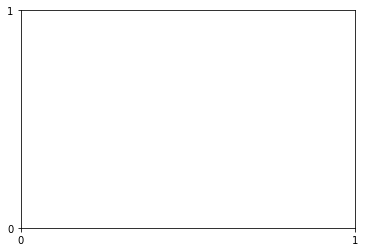

In [79]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [ ]:
#Heatmap and ROC curve generation

In [ ]:
#5.5

Text(0.5,15,'Predicted label')

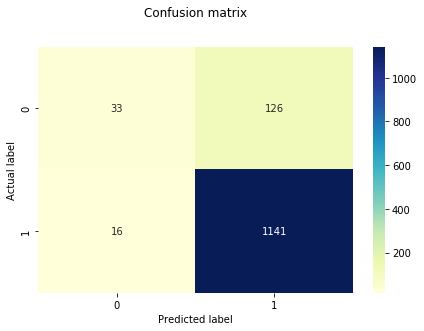

In [90]:
sns.heatmap(pd.DataFrame(cnf_matrix5), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [92]:
print("Accuracy:",metrics.accuracy_score(y5_test, y5_pred))
print("Precision:",metrics.precision_score(y5_test, y5_pred))
print("Recall:",metrics.recall_score(y5_test, y5_pred))

('Accuracy:', 0.89209726443769)
('Precision:', 0.9005524861878453)
('Recall:', 0.986171132238548)


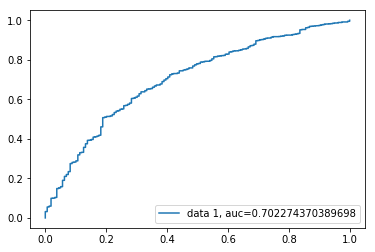

In [93]:
y5_pred_proba = logreg.predict_proba(X5array_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y5_test,  y5_pred_proba)
auc = metrics.roc_auc_score(y5_test, y5_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#6.5

Text(0.5,15,'Predicted label')

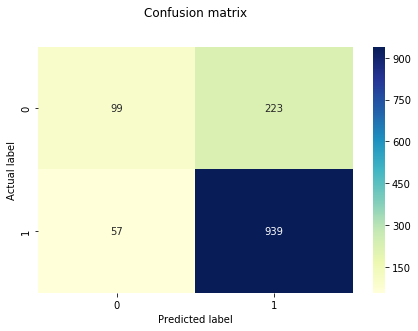

In [85]:
sns.heatmap(pd.DataFrame(cnf_matrix6), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
print("Accuracy:",metrics.accuracy_score(y6_test, y6_pred))
print("Precision:",metrics.precision_score(y6_test, y6_pred))
print("Recall:",metrics.recall_score(y6_test, y6_pred))

('Accuracy:', 0.787556904400607)
('Precision:', 0.8080895008605852)
('Recall:', 0.9427710843373494)


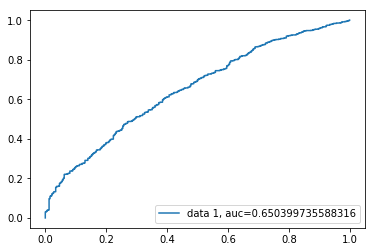

In [95]:
y6_pred_proba = logreg.predict_proba(X6array_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y6_test,  y6_pred_proba)
auc = metrics.roc_auc_score(y6_test, y6_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#7.5

Text(0.5,15,'Predicted label')

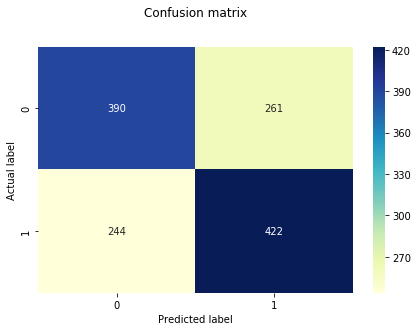

In [86]:
sns.heatmap(pd.DataFrame(cnf_matrix7), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [96]:
print("Accuracy:",metrics.accuracy_score(y7_test, y7_pred))
print("Precision:",metrics.precision_score(y7_test, y7_pred))
print("Recall:",metrics.recall_score(y7_test, y7_pred))

('Accuracy:', 0.6165527714502658)
('Precision:', 0.6178623718887262)
('Recall:', 0.6336336336336337)


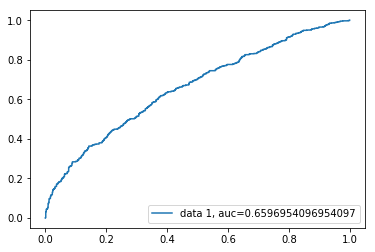

In [97]:
y7_pred_proba = logreg.predict_proba(X7array_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y7_test,  y7_pred_proba)
auc = metrics.roc_auc_score(y7_test, y7_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#8.5

Text(0.5,15,'Predicted label')

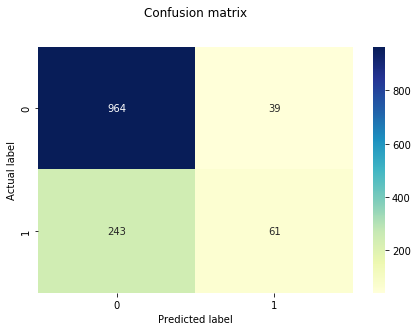

In [87]:
sns.heatmap(pd.DataFrame(cnf_matrix8), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [99]:
print("Accuracy:",metrics.accuracy_score(y8_test, y8_pred))
print("Precision:",metrics.precision_score(y8_test, y8_pred))
print("Recall:",metrics.recall_score(y8_test, y8_pred))

('Accuracy:', 0.7842387146136189)
('Precision:', 0.61)
('Recall:', 0.20065789473684212)


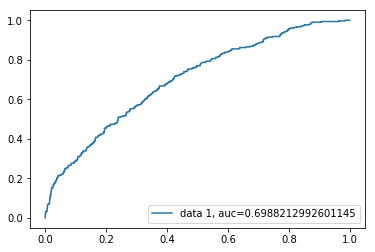

In [100]:
y8_pred_proba = logreg.predict_proba(X8array_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y8_test,  y8_pred_proba)
auc = metrics.roc_auc_score(y8_test, y8_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()